In [4]:
!pip install xlrd

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# machine learning
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVC, LinearSVC,SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
import joblib
data=joblib.load("flight_price_prediction.xlsx")

In [3]:
data

,Departure Time,Arrival Time,Source,Destination,Duration,Stoppage,Flight Name,Price
0,16:05,20:40,New Delhi,Bangalore,4h 35m,1 Stop,Air Asia,"7,423"
1,09:25,14:40,New Delhi,Bangalore,5h 15m,1 Stop,Air Asia,"7,423"
2,15:25,20:40,New Delhi,Bangalore,5h 15m,1 Stop,Air Asia,"7,423"
3,15:40,21:30,New Delhi,Bangalore,5h 50m,1 Stop,Air Asia,"7,423"
4,05:00,11:35,New Delhi,Bangalore,6h 35m,1 Stop,Air Asia,"7,423"
...,...,...,...,...,...,...,...,...
59,17:05,17:05,Delhi,Ahmedabad,10h 45m,2+-stop,Air India,"17,834"
60,18:00,18:00,Delhi,Ahmedabad,12h 35m,1-stop,Air India,"19,763"
61,21:30,21:30,Delhi,Ahmedabad,14h 00m,1-stop,GO FIRST,"20,131"
62,18:05,18:05,Delhi,Ahmedabad,07h 35m,2+-stop,Air India,"20,259"


# Checking the datatype of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 63
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Departure Time  1739 non-null   object
 1   Arrival Time    1739 non-null   object
 2   Source          1739 non-null   object
 3   Destination     1739 non-null   object
 4   Duration        1739 non-null   object
 5   Stoppage        1739 non-null   object
 6   Flight Name     1739 non-null   object
 7   Price           1739 non-null   object
dtypes: object(8)
memory usage: 122.3+ KB


# Checking the missing value

In [5]:
data.isna().sum()

Departure Time    0
Arrival Time      0
Source            0
Destination       0
Duration          0
Stoppage          0
Flight Name       0
Price             0
dtype: int64

# Providing the summary of the dataset

In [6]:
data.describe()

,Departure Time,Arrival Time,Source,Destination,Duration,Stoppage,Flight Name,Price
count,1739,1739,1739,1739,1739,1739,1739,1739
unique,237,341,9,13,421,7,9,577
top,08:00,18:15,New Delhi,Mumbai,02h 10m,1 Stop,Vistara,"5,955"
freq,37,26,459,579,24,618,451,85


# Finding The Unique Value of the Train_data

In [7]:

for each_col in data.columns:
    print(each_col)
    print(data[each_col].value_counts())
    print("")

Departure Time
08:00    37
06:00    34
07:00    32
13:30    30
06:20    29
         ..
23:25     1
20:25     1
01:25     1
13:45     1
10:10     1
Name: Departure Time, Length: 237, dtype: int64

Arrival Time
18:15             26
19:35             24
19:15             21
13:50\n+ 1 day    18
18:15\n+ 1 day    18
                  ..
01:35              1
10:50              1
18:25              1
12:20              1
03:30              1
Name: Arrival Time, Length: 341, dtype: int64

Source
New Delhi    459
Delhi        380
Mumbai       379
Bangalore    304
Jaipur        77
Guwahati      58
Lucknow       38
Chennai       25
Pune          19
Name: Source, dtype: int64

Destination
Mumbai        579
Kolkata       249
Bangalore     168
Ahmedabad     130
Guwahati      117
Chandigarh    100
Pune           82
Goa            82
Kochi          76
Patna          68
New Delhi      38
Hyderabad      25
Lucknow        25
Name: Destination, dtype: int64

Duration
02h 10m    24
02h 15m    21
2h 05m   

# Preprocessing of the dataset

In [8]:
# Removing the symbol and comma in the price column
data['Price'] = data['Price'].str.replace(',', '')
data['Price'] = data['Price'].str.replace('₹', '')

In [9]:
# Converting the price column into "int"
data['Price'] = data['Price'].astype(int)

In [10]:
# We have successfully converted into the price into int datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 63
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Departure Time  1739 non-null   object
 1   Arrival Time    1739 non-null   object
 2   Source          1739 non-null   object
 3   Destination     1739 non-null   object
 4   Duration        1739 non-null   object
 5   Stoppage        1739 non-null   object
 6   Flight Name     1739 non-null   object
 7   Price           1739 non-null   int32 
dtypes: int32(1), object(7)
memory usage: 115.5+ KB


# Visualization 

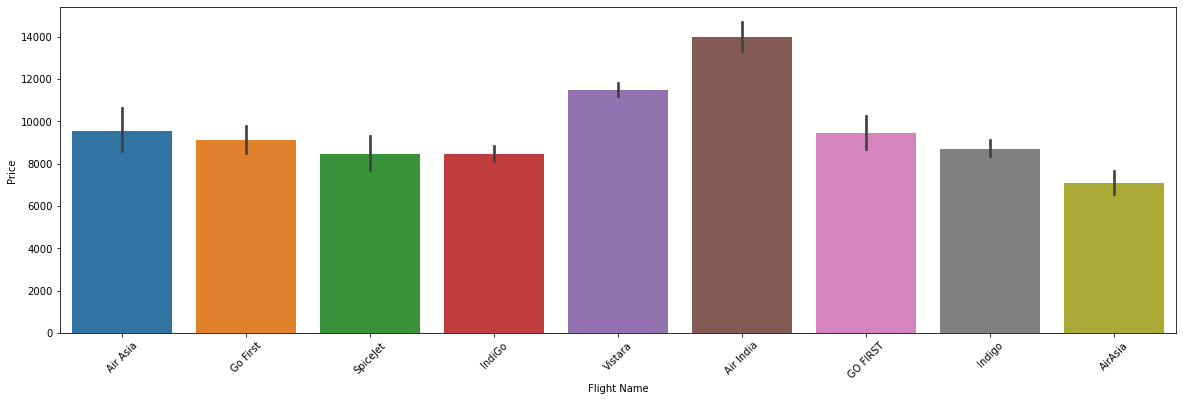

In [11]:
plt.figure(figsize=(20, 6))
sns.barplot(data=data, x = 'Flight Name', y='Price')
plt.xticks(rotation=45)
plt.show()

## Highest price of the airline is of "Air India" and "Vistara" and the least price od airline is of "AirAsia"

[Text(0, 0, 'Air Asia'),
 Text(1, 0, 'Go First'),
 Text(2, 0, 'SpiceJet'),
 Text(3, 0, 'IndiGo'),
 Text(4, 0, 'Vistara'),
 Text(5, 0, 'Air India'),
 Text(6, 0, 'GO FIRST'),
 Text(7, 0, 'Indigo'),
 Text(8, 0, 'AirAsia')]

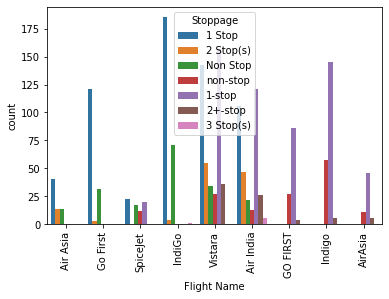

In [12]:
chart=sns.countplot(x='Flight Name',hue='Stoppage',data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [13]:
# As there is same label meaning with different name have to be replaced

In [14]:
data['Flight Name']=data['Flight Name'].str.replace('Go First','GO FIRST')
data['Flight Name']=data['Flight Name'].str.replace('Air Asia','AirAsia')
data['Flight Name']=data['Flight Name'].str.replace('Indigo','IndiGo')

In [15]:
data['Stoppage']=data['Stoppage'].str.replace('1-stop','1 Stop')
data['Stoppage']=data['Stoppage'].str.replace('non-stop','Non Stop')

[Text(0, 0, 'AirAsia'),
 Text(1, 0, 'GO FIRST'),
 Text(2, 0, 'SpiceJet'),
 Text(3, 0, 'IndiGo'),
 Text(4, 0, 'Vistara'),
 Text(5, 0, 'Air India')]

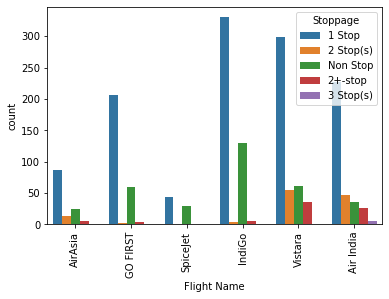

In [16]:
chart=sns.countplot(x='Flight Name',hue='Stoppage',data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# More number of 1 stop with most of the Airlines and every airline also has non-stop flight."IndiGo" has the highest no of non-stop and 1-stop flights

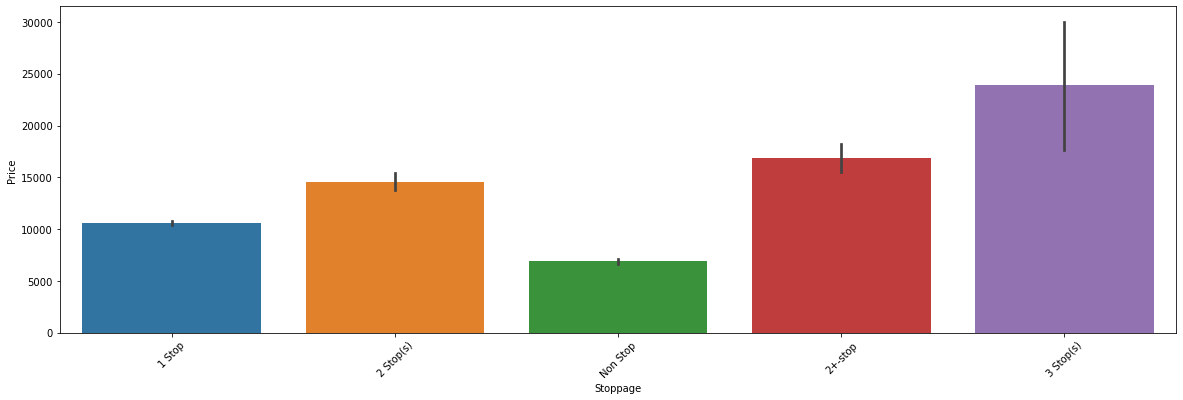

In [17]:
plt.figure(figsize=(20, 6))
sns.barplot(data=data, x = 'Stoppage', y='Price')
plt.xticks(rotation=45)
plt.show()

# As the stoppage increases,price also increases.It means stoppage is directly proportional to the prices

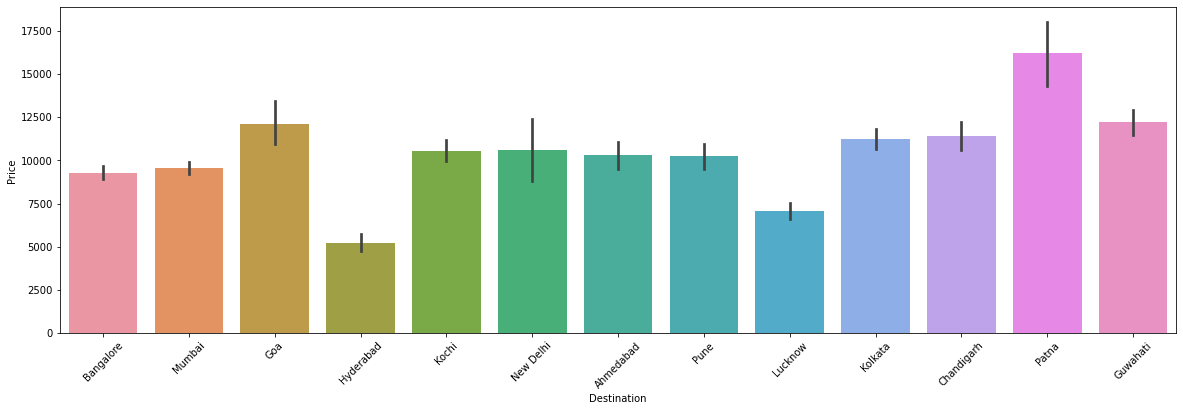

In [18]:
plt.figure(figsize=(20, 6))
sns.barplot(data=data, x = 'Destination', y='Price')
plt.xticks(rotation=45)
plt.show()

# The highest price of the destination is of 'Patna' and least of 'Hyderabad'

In [19]:
data

,Departure Time,Arrival Time,Source,Destination,Duration,Stoppage,Flight Name,Price
0,16:05,20:40,New Delhi,Bangalore,4h 35m,1 Stop,AirAsia,7423
1,09:25,14:40,New Delhi,Bangalore,5h 15m,1 Stop,AirAsia,7423
2,15:25,20:40,New Delhi,Bangalore,5h 15m,1 Stop,AirAsia,7423
3,15:40,21:30,New Delhi,Bangalore,5h 50m,1 Stop,AirAsia,7423
4,05:00,11:35,New Delhi,Bangalore,6h 35m,1 Stop,AirAsia,7423
...,...,...,...,...,...,...,...,...
59,17:05,17:05,Delhi,Ahmedabad,10h 45m,2+-stop,Air India,17834
60,18:00,18:00,Delhi,Ahmedabad,12h 35m,1 Stop,Air India,19763
61,21:30,21:30,Delhi,Ahmedabad,14h 00m,1 Stop,GO FIRST,20131
62,18:05,18:05,Delhi,Ahmedabad,07h 35m,2+-stop,Air India,20259


In [20]:
data['Source'].value_counts()

New Delhi    459
Delhi        380
Mumbai       379
Bangalore    304
Jaipur        77
Guwahati      58
Lucknow       38
Chennai       25
Pune          19
Name: Source, dtype: int64

## New Delhi and the Delhi are the same, so we will be replacing New Delhi with  Delhi

In [21]:
data['Source']=data['Source'].str.replace('New Delhi',' Delhi')

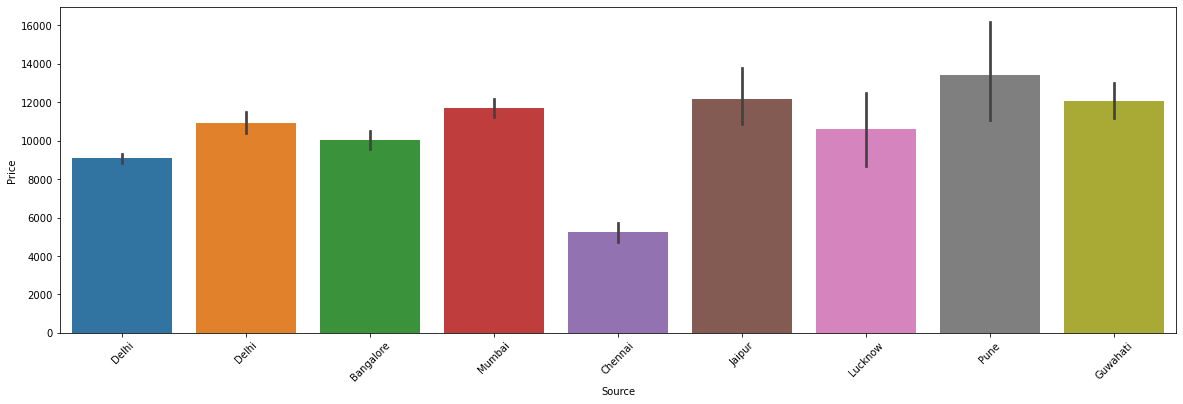

In [22]:
plt.figure(figsize=(20, 6))
sns.barplot(data=data, x = 'Source', y='Price')
plt.xticks(rotation=45)
plt.show()

# The highest price of the source is from 'Pune','Jaipur','Mumbai' and the least price is from 'Chennai'

In [23]:
data

,Departure Time,Arrival Time,Source,Destination,Duration,Stoppage,Flight Name,Price
0,16:05,20:40,Delhi,Bangalore,4h 35m,1 Stop,AirAsia,7423
1,09:25,14:40,Delhi,Bangalore,5h 15m,1 Stop,AirAsia,7423
2,15:25,20:40,Delhi,Bangalore,5h 15m,1 Stop,AirAsia,7423
3,15:40,21:30,Delhi,Bangalore,5h 50m,1 Stop,AirAsia,7423
4,05:00,11:35,Delhi,Bangalore,6h 35m,1 Stop,AirAsia,7423
...,...,...,...,...,...,...,...,...
59,17:05,17:05,Delhi,Ahmedabad,10h 45m,2+-stop,Air India,17834
60,18:00,18:00,Delhi,Ahmedabad,12h 35m,1 Stop,Air India,19763
61,21:30,21:30,Delhi,Ahmedabad,14h 00m,1 Stop,GO FIRST,20131
62,18:05,18:05,Delhi,Ahmedabad,07h 35m,2+-stop,Air India,20259


In [24]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
data['Duration_hours']=data.Duration.apply(lambda x:get_duration(x)[0])
data['Duration_mins']=data.Duration.apply(lambda x:get_duration(x)[1])
data.drop(["Duration"], axis = 1, inplace = True)

In [25]:
data

,Departure Time,Arrival Time,Source,Destination,Stoppage,Flight Name,Price,Duration_hours,Duration_mins
0,16:05,20:40,Delhi,Bangalore,1 Stop,AirAsia,7423,4,35
1,09:25,14:40,Delhi,Bangalore,1 Stop,AirAsia,7423,5,15
2,15:25,20:40,Delhi,Bangalore,1 Stop,AirAsia,7423,5,15
3,15:40,21:30,Delhi,Bangalore,1 Stop,AirAsia,7423,5,50
4,05:00,11:35,Delhi,Bangalore,1 Stop,AirAsia,7423,6,35
...,...,...,...,...,...,...,...,...,...
59,17:05,17:05,Delhi,Ahmedabad,2+-stop,Air India,17834,10,45
60,18:00,18:00,Delhi,Ahmedabad,1 Stop,Air India,19763,12,35
61,21:30,21:30,Delhi,Ahmedabad,1 Stop,GO FIRST,20131,14,0
62,18:05,18:05,Delhi,Ahmedabad,2+-stop,Air India,20259,7,35


# As the duration of hours increases, the price also increases

In [26]:
data.drop(columns=['Duration_mins'])

,Departure Time,Arrival Time,Source,Destination,Stoppage,Flight Name,Price,Duration_hours
0,16:05,20:40,Delhi,Bangalore,1 Stop,AirAsia,7423,4
1,09:25,14:40,Delhi,Bangalore,1 Stop,AirAsia,7423,5
2,15:25,20:40,Delhi,Bangalore,1 Stop,AirAsia,7423,5
3,15:40,21:30,Delhi,Bangalore,1 Stop,AirAsia,7423,5
4,05:00,11:35,Delhi,Bangalore,1 Stop,AirAsia,7423,6
...,...,...,...,...,...,...,...,...
59,17:05,17:05,Delhi,Ahmedabad,2+-stop,Air India,17834,10
60,18:00,18:00,Delhi,Ahmedabad,1 Stop,Air India,19763,12
61,21:30,21:30,Delhi,Ahmedabad,1 Stop,GO FIRST,20131,14
62,18:05,18:05,Delhi,Ahmedabad,2+-stop,Air India,20259,7


# Highest correlation with the price is with the "Duration_hour"

In [27]:
for i in data.columns:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        data[i]=le.fit_transform(data[i])

In [28]:
data

,Departure Time,Arrival Time,Source,Destination,Stoppage,Flight Name,Price,Duration_hours,Duration_mins
0,150,292,0,1,0,1,85,4,7
1,73,200,0,1,0,1,85,5,3
2,143,292,0,1,0,1,85,5,3
3,146,307,0,1,0,1,85,5,10
4,24,155,0,1,0,1,85,6,7
...,...,...,...,...,...,...,...,...,...
59,160,238,3,0,2,0,498,10,9
60,171,251,3,0,0,0,522,12,7
61,212,307,3,0,0,2,530,14,0
62,172,252,3,0,2,0,531,7,7


<AxesSubplot:>

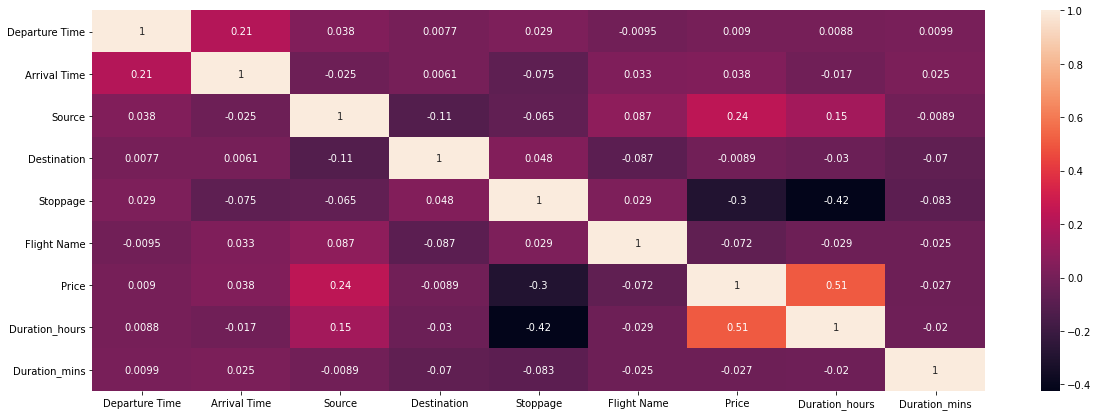

In [29]:
## we will correlate the data and visualize through heatmap
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

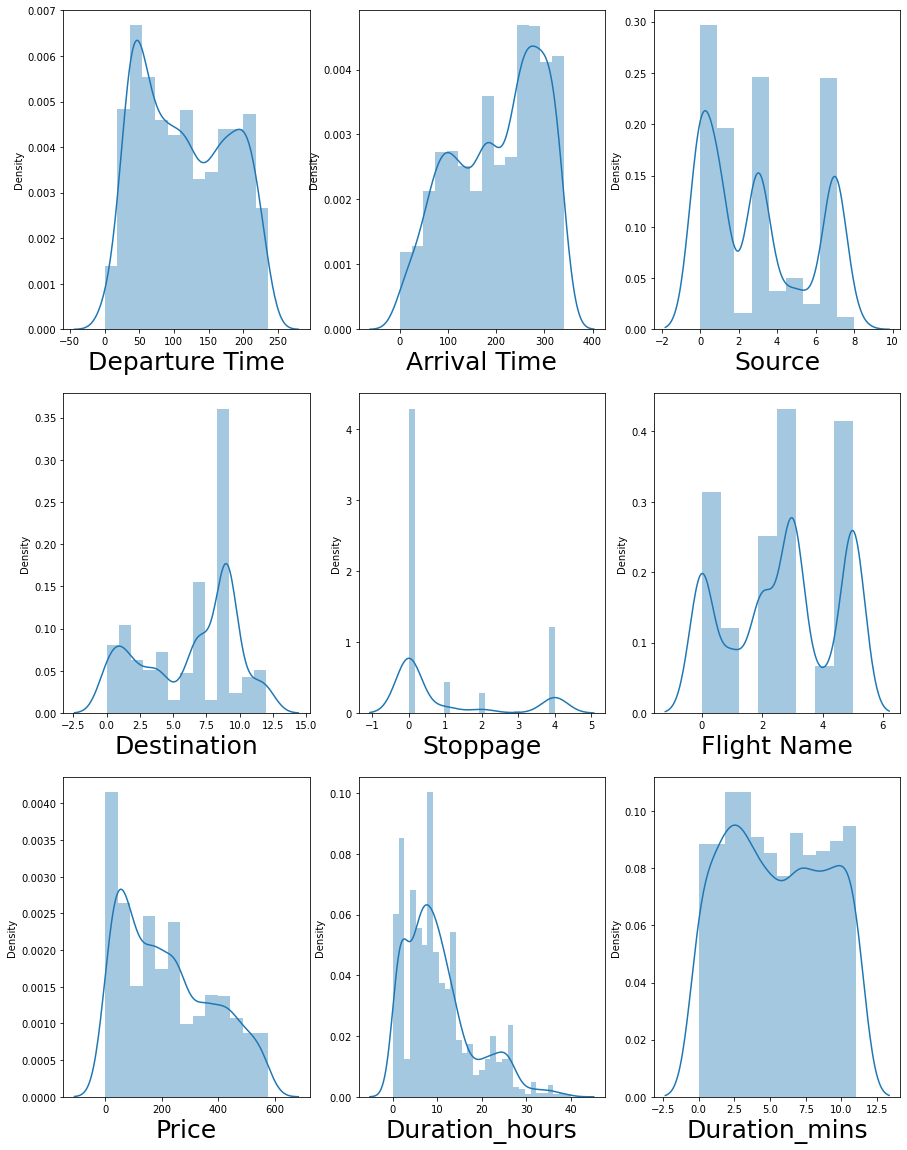

In [30]:
### Now we will visualize the data to see the outlier

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1


#for columns in data.columns.values:
for column in data:
    if plotnumber<=9:
        
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

In [31]:
data.skew()

Departure Time    0.180977
Arrival Time     -0.358172
Source            0.443870
Destination      -0.412214
Stoppage          1.274133
Flight Name      -0.119193
Price             0.489419
Duration_hours    1.096565
Duration_mins     0.069360
dtype: float64

In [32]:
from scipy.stats import zscore
import numpy as np

In [33]:
z=np.abs(zscore(data))
threshold=3
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(1739, 9)
(1720, 9)


In [34]:
x=data_new.drop('Price',axis=1)
y=data_new['Price']

In [35]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# Building the model

In [36]:
# RandomForestRegressor

regressor=RandomForestRegressor(n_estimators = 100, random_state = 15)
regressor.fit(x_train,y_train)
y_Pred=regressor.predict(x_test)

In [37]:
print('Training Score :',regressor.score(x_train, y_train))
print('Test Score     :',regressor.score(x_test, y_Pred))

Training Score : 0.9444864995005026
Test Score     : 1.0


In [64]:
# Linear Regression

lr= LinearRegression()
lr.fit(x_train, y_train)
Y_pred = lr.predict(x_test)

In [65]:
print('Training Score :',lr.score(x_train, y_train))
print('Test Score     :',lr.score(x_test, Y_pred))

Training Score : 0.3020784969777255
Test Score     : 1.0


In [40]:
# DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
Y_pred = dt.predict(x_test)

In [41]:
#score3=r2_score(y_test,Y_pred)
#score3
print('Training Score :',dt.score(x_train, y_train))
print('Test Score     :',dt.score(x_test, Y_pred))

Training Score : 0.999501698555937
Test Score     : 1.0


In [42]:
from xgboost import XGBRegressor
model =  XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_pred =  model.predict(x_test)
print('Training Score :',model.score(x_train, y_train))
print('Test Score     :',model.score(x_test, y_pred))

Training Score : 0.9881369973845
Test Score     : 1.0


In [44]:

rd =  Ridge()
rd.fit(x_train,y_train)

Ridge()

In [45]:
Y_pred =  rd.predict(x_test)
print('Training Score :',rd.score(x_train, y_train))
print('Test Score     :',rd.score(x_test, Y_pred))

Training Score : 0.3020784959654056
Test Score     : 1.0


In [46]:
ls =  Lasso()
ls.fit(x_train,y_train)

Lasso()

In [47]:
Y_pred =  ls.predict(x_test)
print('Training Score :',ls.score(x_train, y_train))
print('Test Score     :',ls.score(x_test, Y_pred))

Training Score : 0.30203690269128336
Test Score     : 1.0


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predict_gbr=gbr.predict(x_test)
gbr.score(x_test,y_test)

0.5037383770054058

In [49]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, predict_gbr))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, predict_gbr))

Mean squared error (MSE): 10489.15
Coefficient of determination (R^2): 0.50


In [50]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predict_rf=rf.predict(x_test)
rf.score(x_test,y_test)

0.5403310521870408

In [51]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, predict_rf))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, predict_rf))

Mean squared error (MSE): 9715.72
Coefficient of determination (R^2): 0.54


# Hyper-Parameter Tunning

In [55]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': [10, 25, 50, 100, 150, 200],
                       'max_features':['auto','square','log2'],
                       'max_depth':[1, 2, 3, 4, 5]}

tree_cv = RandomizedSearchCV(rf, param_dist, cv = 5)

tree_cv.fit(x_train, y_train)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'n_estimators': 50, 'max_features': 'log2', 'max_depth': 5}
Best score is 0.49251058844389795


In [58]:
mod=RandomForestRegressor(max_depth=5,max_features='log2',n_estimators=50)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(rf.score(x_test,y_test)*100)

54.03310521870408


# Saving the model

In [59]:
import joblib
joblib.dump(mod,"flight_price_prediction_model.pkl")

['flight_price_prediction_model.pkl']